# 自己再編成リスト

In [214]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

In [145]:
class MyList:
    """
    自己再編成は行わない
    """
    def __init__(self, kv_list):
        n = len(kv_list)
        self.data = []
        self.i_head = 0
        self.data.append([kv_list[0][0], kv_list[0][1], None, 1])
        for i in range(1, n-1):
            self.data.append([kv_list[i][0], kv_list[i][1], i-1, i+1])
        self.data.append([kv_list[n-1][0], kv_list[n-1][1], n-2, None])
    
    def get_result_elem(self, key):
        i_next = self.i_head
        while i_next is not None:
            i_now = i_next
            k, v, i_prev, i_next = self.data[i_now]
            if k == key:
                return k, v, i_prev, i_next, i_now
        raise Exception('key {} not found'.format(key))

    def search(self, key):
        k, v, i_prev, i_next, i_target = self.get_result_elem(key)
        return v

class SelfOrganizingMyList1(MyList):
    """
    検索されたデータを先頭に挿入する
    """
    def search(self, key):
        k, v, i_prev, i_next, i_target = self.get_result_elem(key)
        if i_target != self.i_head:
            self.data[i_target][2], self.data[i_target][3] = None, self.i_head
            self.data[self.i_head][2] = i_target
            self.data[i_prev][3] = i_next
            if i_next is not None:
                self.data[i_next][2] = i_prev
            self.i_head = i_target
        return v

class SelfOrganizingMyList2(MyList):
    """
    検索されたデータを1つ前と交換する
    """
    def search(self, key):
        k, v, i_prev, i_next, i_target = self.get_result_elem(key)
        if i_target != self.i_head:
            self.data[i_target][0], self.data[i_target][1] = self.data[i_prev][0], self.data[i_prev][1]
            self.data[i_prev][0], self.data[i_prev][1] = k, v
        return v

In [150]:
l = [['a', 100], ['b', 200], ['c', 300], ['d', 400], ['e', 500]]

def func(impl_list):
    print(impl_list.data)
    for k in ['a', 'b', 'd', 'd', 'c', 'a', 'e', 'c', 'e', 'b']:
        v = list_impl.search(k)
        print('k={}, v={}, list.data={}, list.i_head={}'.format(k, v, list_impl.data, list_impl.i_head))

In [151]:
func(MyList(l))

[['a', 100, None, 1], ['b', 200, 0, 2], ['c', 300, 1, 3], ['d', 400, 2, 4], ['e', 500, 3, None]]
k=a, v=100, list.data=[['a', 100, None, 1], ['b', 200, 0, 2], ['c', 300, 1, 3], ['d', 400, 2, 4], ['e', 500, 3, None]], list.i_head=0
k=b, v=200, list.data=[['a', 100, None, 1], ['b', 200, 0, 2], ['c', 300, 1, 3], ['d', 400, 2, 4], ['e', 500, 3, None]], list.i_head=0
k=d, v=400, list.data=[['a', 100, None, 1], ['b', 200, 0, 2], ['c', 300, 1, 3], ['d', 400, 2, 4], ['e', 500, 3, None]], list.i_head=0
k=d, v=400, list.data=[['a', 100, None, 1], ['b', 200, 0, 2], ['c', 300, 1, 3], ['d', 400, 2, 4], ['e', 500, 3, None]], list.i_head=0
k=c, v=300, list.data=[['a', 100, None, 1], ['b', 200, 0, 2], ['c', 300, 1, 3], ['d', 400, 2, 4], ['e', 500, 3, None]], list.i_head=0
k=a, v=100, list.data=[['a', 100, None, 1], ['b', 200, 0, 2], ['c', 300, 1, 3], ['d', 400, 2, 4], ['e', 500, 3, None]], list.i_head=0
k=e, v=500, list.data=[['a', 100, None, 1], ['b', 200, 0, 2], ['c', 300, 1, 3], ['d', 400, 2, 4], [

In [152]:
func(SelfOrganizingMyList1(l))

[['a', 100, None, 1], ['b', 200, 0, 2], ['c', 300, 1, 3], ['d', 400, 2, 4], ['e', 500, 3, None]]
k=a, v=100, list.data=[['a', 100, None, 1], ['b', 200, 0, 2], ['c', 300, 1, 3], ['d', 400, 2, 4], ['e', 500, 3, None]], list.i_head=0
k=b, v=200, list.data=[['a', 100, 1, 2], ['b', 200, None, 0], ['c', 300, 0, 3], ['d', 400, 2, 4], ['e', 500, 3, None]], list.i_head=1
k=d, v=400, list.data=[['a', 100, 1, 2], ['b', 200, 3, 0], ['c', 300, 0, 4], ['d', 400, None, 1], ['e', 500, 2, None]], list.i_head=3
k=d, v=400, list.data=[['a', 100, 1, 2], ['b', 200, 3, 0], ['c', 300, 0, 4], ['d', 400, None, 1], ['e', 500, 2, None]], list.i_head=3
k=c, v=300, list.data=[['a', 100, 1, 4], ['b', 200, 3, 0], ['c', 300, None, 3], ['d', 400, 2, 1], ['e', 500, 0, None]], list.i_head=2
k=a, v=100, list.data=[['a', 100, None, 2], ['b', 200, 3, 4], ['c', 300, 0, 3], ['d', 400, 2, 1], ['e', 500, 1, None]], list.i_head=0
k=e, v=500, list.data=[['a', 100, 4, 2], ['b', 200, 3, None], ['c', 300, 0, 3], ['d', 400, 2, 1], [

In [153]:
func(SelfOrganizingMyList2(l))

[['a', 100, None, 1], ['b', 200, 0, 2], ['c', 300, 1, 3], ['d', 400, 2, 4], ['e', 500, 3, None]]
k=a, v=100, list.data=[['a', 100, None, 1], ['b', 200, 0, 2], ['c', 300, 1, 3], ['d', 400, 2, 4], ['e', 500, 3, None]], list.i_head=0
k=b, v=200, list.data=[['b', 200, None, 1], ['a', 100, 0, 2], ['c', 300, 1, 3], ['d', 400, 2, 4], ['e', 500, 3, None]], list.i_head=0
k=d, v=400, list.data=[['b', 200, None, 1], ['a', 100, 0, 2], ['d', 400, 1, 3], ['c', 300, 2, 4], ['e', 500, 3, None]], list.i_head=0
k=d, v=400, list.data=[['b', 200, None, 1], ['d', 400, 0, 2], ['a', 100, 1, 3], ['c', 300, 2, 4], ['e', 500, 3, None]], list.i_head=0
k=c, v=300, list.data=[['b', 200, None, 1], ['d', 400, 0, 2], ['c', 300, 1, 3], ['a', 100, 2, 4], ['e', 500, 3, None]], list.i_head=0
k=a, v=100, list.data=[['b', 200, None, 1], ['d', 400, 0, 2], ['a', 100, 1, 3], ['c', 300, 2, 4], ['e', 500, 3, None]], list.i_head=0
k=e, v=500, list.data=[['b', 200, None, 1], ['d', 400, 0, 2], ['a', 100, 1, 3], ['e', 500, 2, 4], [

In [258]:
# 検索キーに偏りがある場合
LIST_LENGTH = int(1e4)

l = [[i, 'v_{}'.format(i)] for i in range(LIST_LENGTH)]
list_simple, list_selforg1, list_selforg2 = MyList(l), SelfOrganizingMyList1(l), SelfOrganizingMyList2(l)

t_simple, t_selforg1, t_selforg2 = [], [], []

In [259]:
NUM_SEARCH_PER_UNIT = 1000
REPETITION_TIME = 30
for n in range(REPETITION_TIME):
    query = []
    while len(query) < NUM_SEARCH_PER_UNIT:
        r = np.random.normal(LIST_LENGTH/2, LIST_LENGTH/10)
        q = int(r)
        if 0 <= q and q < LIST_LENGTH:
            query.append(q)
        
    start = time.time()
    for q in query:
        value = list_simple.search(q)
    end = time.time()
    t_simple.append(round((end-start), 6))
    
    start = time.time()
    for q in query:
        value = list_selforg1.search(q)
    end = time.time()
    t_selforg1.append(round((end-start), 6))
    
    start = time.time()
    for q in query:
        value = list_selforg2.search(q)
    end = time.time()
    t_selforg2.append(round((end-start), 6))

In [260]:
pd.DataFrame(
    data=np.array([t_simple, t_selforg1, t_selforg2]).T,
    columns=['time ave. (no self-org) [s]', 'time ave. (self-org: ex_head) [s]', 'time ave. (self-org: ex_prev) [s]']
)

,time ave. (no self-org) [s],time ave. (self-org: ex_head) [s],time ave. (self-org: ex_prev) [s]
0,1.124488,0.885273,0.874281
1,1.275513,1.397961,0.865740
2,1.028162,0.731827,0.870345
3,1.047737,0.646503,0.867145
4,1.043538,0.691328,0.881702
5,1.036015,0.607146,0.867978
6,1.058305,0.567604,0.872004
7,1.107233,0.547802,0.867187
8,1.066353,0.523238,0.908573
9,1.042965,0.524527,0.876397


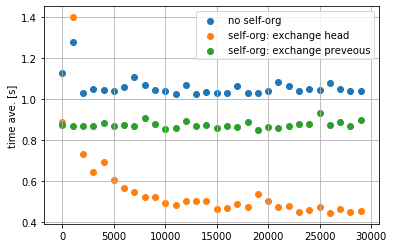

In [261]:
x = [i*NUM_SEARCH_PER_UNIT for i in range(len(t_simple))]
plt.xlabel('')
plt.ylabel('time ave. [s]')
plt.scatter(x, t_simple, label='no self-org')
plt.scatter(x, t_selforg1, label='self-org: exchange head')
plt.scatter(x, t_selforg2, label='self-org: exchange preveous')
plt.grid()
plt.legend()
plt.show()

In [263]:
# 検索キーが一様な場合
LIST_LENGTH = int(1e4)

l = [[i, 'v_{}'.format(i)] for i in range(LIST_LENGTH)]
list_simple, list_selforg1, list_selforg2 = MyList(l), SelfOrganizingMyList1(l), SelfOrganizingMyList2(l)

t_simple, t_selforg1, t_selforg2 = [], [], []

In [264]:
NUM_SEARCH_PER_UNIT = 1000
REPETITION_TIME = 30
for n in range(REPETITION_TIME):
    query = []
    while len(query) < NUM_SEARCH_PER_UNIT:
        r = np.random.randint(LIST_LENGTH)
        query.append(r)
        
    start = time.time()
    for q in query:
        value = list_simple.search(q)
    end = time.time()
    t_simple.append(round((end-start), 6))
    
    start = time.time()
    for q in query:
        value = list_selforg1.search(q)
    end = time.time()
    t_selforg1.append(round((end-start), 6))
    
    start = time.time()
    for q in query:
        value = list_selforg2.search(q)
    end = time.time()
    t_selforg2.append(round((end-start), 6))

In [265]:
pd.DataFrame(
    data=np.array([t_simple, t_selforg1, t_selforg2]).T,
    columns=['time ave. (no self-org) [s]', 'time ave. (self-org: ex_head) [s]', 'time ave. (self-org: ex_prev) [s]']
)

,time ave. (no self-org) [s],time ave. (self-org: ex_head) [s],time ave. (self-org: ex_prev) [s]
0,1.297631,1.414729,1.273036
1,1.272545,1.571825,1.278990
2,1.329402,1.305478,1.024492
3,1.106224,1.298259,1.098337
4,1.076815,1.324288,1.042626
5,1.108189,1.356894,1.041879
6,1.052143,1.400459,1.042040
7,1.076753,1.384268,1.054327
8,1.119014,1.521354,1.031636
9,1.067363,1.484670,1.050824


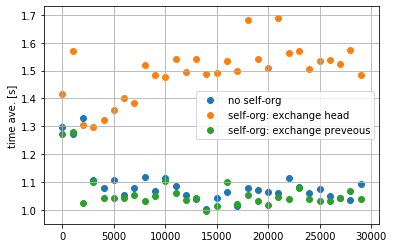

In [266]:
x = [i*NUM_SEARCH_PER_UNIT for i in range(len(t_simple))]
plt.xlabel('')
plt.ylabel('time ave. [s]')
plt.scatter(x, t_simple, label='no self-org')
plt.scatter(x, t_selforg1, label='self-org: exchange head')
plt.scatter(x, t_selforg2, label='self-org: exchange preveous')
plt.grid()
plt.legend()
plt.show()